In [1]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, o

In [3]:
load('stomach.Rdata')

In [4]:
stomach

An object of class Seurat 
18697 features across 2855 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, tsne

In [29]:
# 細胞のクラスターとそれぞれの数
print(unique(stomach@active.ident))
print(count(stomach@active.ident==3))
print(count(stomach@active.ident==5))
print(count(stomach@active.ident==7))
print(count(stomach@active.ident==13))

[1] 3  5  7  13
Levels: 3 5 7 13
[1] 1237
[1] 759
[1] 641
[1] 218


# cluster 3 -> 1237個

10N->1, 11N->2, 6N->3, 8N->4, 9N->5

In [85]:
# 10N-total　かつ　cluster3
a <- stomach@meta.data[stomach@meta.data[,1]=='10N-total',]
b <- a[a$integrated_snn_res.0.8==3,]
cluster3_10N_total = rownames(b)

In [81]:
stomach@meta.data %>% filter(orig.ident=='10N-total') %>% 
filter(integrated_snn_res.0.8 =='3') %>%
dim

[1] 193   6

In [31]:
stomach@meta.data %>% filter(orig.ident=='11N-total') %>% 
filter(integrated_snn_res.0.8 =='3') %>%
dim

[1] 103   6

In [32]:
stomach@meta.data %>% filter(orig.ident=='9N-total') %>% 
filter(integrated_snn_res.0.8 =='3') %>%
dim

[1] 497   6

In [33]:
stomach@meta.data %>% filter(orig.ident=='6N-total') %>% 
filter(integrated_snn_res.0.8 =='3') %>%
dim

[1] 339   6

In [34]:
stomach@meta.data %>% filter(orig.ident=='8N-total') %>% 
filter(integrated_snn_res.0.8 =='3') %>%
dim

[1] 105   6

# cluster5 -> 759個

In [35]:
# 10N-total　かつ　cluster5
stomach@meta.data %>% filter(orig.ident=='10N-total') %>% 
filter(integrated_snn_res.0.8 =='5') %>%
dim

[1] 219   6

In [36]:
# 10N-total　かつ　cluster5
stomach@meta.data %>% filter(orig.ident=='11N-total') %>% 
filter(integrated_snn_res.0.8 =='5') %>%
dim

[1] 236   6

In [37]:
# 10N-total　かつ　cluster5
stomach@meta.data %>% filter(orig.ident=='9N-total') %>% 
filter(integrated_snn_res.0.8 =='5') %>%
dim

[1] 123   6

In [38]:
# 10N-total　かつ　cluster5
stomach@meta.data %>% filter(orig.ident=='6N-total') %>% 
filter(integrated_snn_res.0.8 =='5') %>%
dim

[1] 68  6

In [39]:
# 10N-total　かつ　cluster5
stomach@meta.data %>% filter(orig.ident=='8N-total') %>% 
filter(integrated_snn_res.0.8 =='5') %>%
dim

[1] 113   6

# cluster 7 -> 641個

In [161]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='10N-total') %>% 
filter(integrated_snn_res.0.8 =='7') %>%
dim

[1] 125   6

In [41]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='11N-total') %>% 
filter(integrated_snn_res.0.8 =='7') %>%
dim

[1] 115   6

In [42]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='9N-total') %>% 
filter(integrated_snn_res.0.8 =='7') %>%
dim

[1] 140   6

In [43]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='6N-total') %>% 
filter(integrated_snn_res.0.8 =='7') %>%
dim

[1] 141   6

In [44]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='8N-total') %>% 
filter(integrated_snn_res.0.8 =='7') %>%
dim

[1] 120   6

# cluster 13 ->218個

In [50]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='10N-total') %>% 
filter(integrated_snn_res.0.8 =='13') %>%
dim

[1] 34  6

In [46]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='11N-total') %>% 
filter(integrated_snn_res.0.8 =='13') %>%
dim

[1] 20  6

In [47]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='9N-total') %>% 
filter(integrated_snn_res.0.8 =='13') %>%
dim

[1] 9 6

In [48]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='6N-total') %>% 
filter(integrated_snn_res.0.8 =='13') %>%
dim

[1] 51  6

In [49]:
# 10N-total　かつ　cluster7
stomach@meta.data %>% filter(orig.ident=='8N-total') %>% 
filter(integrated_snn_res.0.8 =='13') %>%
dim

[1] 104   6

In [13]:
matrix_dir = "/data/share/scRNAseq/results/human_STAD/"

[1] "/data/share/scRNAseq/results/human_STAD/10N-total/a"

10N->1, 11N->2, 6N->3, 8N->4, 9N->5

In [233]:
# 細胞の名前を指定
cells = c('10N-total','11N-total','6N-total','8N-total','9N-total') 

In [234]:
# dir
matrix_dir2 = '/outs/filtered_feature_bc_matrix/'
for(i in 1:length(cells)){
barcode.path <- paste0(matrix_dir, cells[i], matrix_dir2, "barcodes.tsv.gz")
features.path <- paste0(matrix_dir, cells[i], matrix_dir2, "features.tsv.gz")
matrix.path <- paste0(matrix_dir, cells[i], matrix_dir2, "matrix.mtx.gz")
mat <- readMM(file = matrix.path)
feature.names = read.delim(features.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
barcode.names = read.delim(barcode.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
colnames(mat) = paste0(sub('-1','_',barcode.names$V1),i) # SeuratだとUMI末尾が_., rawだと-1のため、変換
rownames(mat) = feature.names$V1

# cluster3
a <- stomach@meta.data[stomach@meta.data[,1]==cells[i],]
b <- a[a$integrated_snn_res.0.8==3,]
cluster3_UMI = rownames(b) 
    if(i==1){mat_cluster3=mat[,cluster3_UMI]}
    else {mat_cluster3=cbind(mat_cluster3,mat[,cluster3_UMI])}

# cluster5
a <- stomach@meta.data[stomach@meta.data[,1]==cells[i],]
b <- a[a$integrated_snn_res.0.8==5,]
cluster5_UMI = rownames(b)
    if(i==1){mat_cluster5=mat[,cluster5_UMI]}
    else {mat_cluster5=cbind(mat_cluster5,mat[,cluster5_UMI])}

# cluster7
a <- stomach@meta.data[stomach@meta.data[,1]==cells[i],]
b <- a[a$integrated_snn_res.0.8==7,]
cluster7_UMI = rownames(b)
    if(i==1){mat_cluster7=mat[,cluster7_UMI]}
    else {mat_cluster7=cbind(mat_cluster7,mat[,cluster7_UMI])}

# cluster13
a <- stomach@meta.data[stomach@meta.data[,1]==cells[i],]
b <- a[a$integrated_snn_res.0.8==13,]
cluster13_UMI = rownames(b)
    if(i==1){mat_cluster13=mat[,cluster13_UMI]}
    else {mat_cluster13=cbind(mat_cluster13,mat[,cluster13_UMI])}
}

In [235]:
dim(mat_cluster3)

[1] 33538  1237

In [97]:
dim(mat_cluster5)

[1] 33538   759

In [237]:
dim(mat_cluster7)

[1] 33538   641

In [238]:
dim(mat_cluster13)

[1] 33538   218

In [105]:
# UMIとクラスターの対応表
UMI_and_cluster = stomach@active.ident

In [243]:
save(mat_cluster3,file="/home/tsubosaka/stomach_normal_marker/RData/mat_cluster3.Rdata")
save(mat_cluster5,file="/home/tsubosaka/stomach_normal_marker/RData/mat_cluster5.Rdata")
save(mat_cluster7,file="/home/tsubosaka/stomach_normal_marker/RData/mat_cluster7.Rdata")
save(mat_cluster13,file="/home/tsubosaka/stomach_normal_marker/RData/mat_cluster13.Rdata")

# Ensemble ID -> gene symbol

In [175]:
library(biomaRt)

In [176]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))

In [180]:
listA <- getBM(filters= "ensembl_gene_id", attributes=c("ensembl_gene_id",'hgnc_symbol'),
              values=rownames(mat_cluster13),mart=mart)

In [190]:
(listA[listA$ensembl_gene_id==(rownames(mat_cluster13)),]

Warning message in listA$ensembl_gene_id == (rownames(mat_cluster13)):
“longer object length is not a multiple of shorter object length”

[1] 60  2

## Ensemble ID -> gene symbol 終了

# zinbwave-deseq2 pipeline　解析開始

In [3]:
library(zinbwave)
library(scRNAseq)
library(matrixStats)
library(magrittr)
library(ggplot2)
library(biomaRt)

Loading required package: SingleCellExperiment


In [4]:
load('/home/tsubosaka/stomach_normal_marker/RData/mat_cluster3.Rdata')
load('/home/tsubosaka/stomach_normal_marker/RData/mat_cluster5.Rdata')
load('/home/tsubosaka/stomach_normal_marker/RData/mat_cluster7.Rdata')
load('/home/tsubosaka/stomach_normal_marker/RData/mat_cluster13.Rdata')

In [5]:
class(as.matrix(mat_cluster3))

[1] "matrix"

In [23]:
colnames(mat_cluster3) %>% head

[1] "AAACGGGCAACGATCT_1" "AAAGATGGTAATCACC_1" "AACCATGGTCCGACGT_1"
[4] "AACCGCGTCAAGGCTT_1" "AACTCCCCAAGAGTCG_1" "AACTTTCTCTCATTCA_1"

In [24]:
rownames(mat_cluster3) %>% head

[1] "ENSG00000243485" "ENSG00000237613" "ENSG00000186092" "ENSG00000238009"
[5] "ENSG00000239945" "ENSG00000239906"

In [34]:
class(mat_cluster3)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [22]:
a <- as.data.frame(as.matrix(mat_cluster3))

In [32]:
a %>% colnames %>% head

[1] "AAACGGGCAACGATCT_1" "AAAGATGGTAATCACC_1" "AACCATGGTCCGACGT_1"
[4] "AACCGCGTCAAGGCTT_1" "AACTCCCCAAGAGTCG_1" "AACTTTCTCTCATTCA_1"

In [33]:
a %>% rownames %>% head

[1] "ENSG00000243485" "ENSG00000237613" "ENSG00000186092" "ENSG00000238009"
[5] "ENSG00000239945" "ENSG00000239906"

In [83]:
dim(mat_cluster3)

[1] 33538  1237

In [84]:
dim(mat_cluster7)

[1] 33538   641

In [85]:
dim(cbind(mat_cluster3,mat_cluster7))

[1] 33538  1878

In [96]:
colnames(mat_cluster5)[1]

[1] "AAACCTGGTCCAAGTT_1"

In [5]:
# count matrixを統合
countA = as.matrix(cbind(mat_cluster3, mat_cluster5, mat_cluster7, mat_cluster13))

In [6]:
dim(countA)

[1] 33538  2855

In [22]:
# SummarizedExperimentに変換
se <- SummarizedExperiment(assays=list(counts=countA, logcounts=log2(countA+1)))

In [23]:
# clusterの情報を付与
colData <- DataFrame(Cluster=c(rep("3", 1237),rep("5",759),rep("7",641),rep("13",218)),
                    row.names=colnames(se))
# colData <- DataFrame(Cluster=c(rep("3", 1237),rep("5",759),rep("7",641),rep("13",218)),
#                   Cluster3=c(rep("3",1237),rep('others',2855-1237)),
#                   Cluster5=c(rep("others",1237),rep('5',759),rep('others',641+218)),
#                   Cluster7=c(rep("others",1237+759),rep('7',641),rep('others',218)),
#                   Cluster13=c(rep("others",2855-218),rep('13',218)),
#                   row.names=colnames(se))
colData(se) <- colData

In [24]:
colData(se)

DataFrame with 2855 rows and 1 column
                       Cluster
                   <character>
AAACGGGCAACGATCT_1           3
AAAGATGGTAATCACC_1           3
AACCATGGTCCGACGT_1           3
AACCGCGTCAAGGCTT_1           3
AACTCCCCAAGAGTCG_1           3
...                        ...
CTACCCATCAAGCCTA_5          13
GACAGAGTCACAAACC_5          13
TCATTACAGCATGGCA_5          13
TGGCGCAAGAAAGTGG_5          13
TGGCTGGTCGAATGCT_5          13

In [25]:
# 一つも発現していない遺伝子・細胞は除く
filter <- rowSums(assay(se)>1)>1
table(filter)

filter
FALSE  TRUE 
23404 10134 

In [26]:
se <- se[filter,]

In [27]:
se

class: SummarizedExperiment 
dim: 10134 2855 
metadata(0):
assays(2): counts logcounts
rownames(10134): ENSG00000237491 ENSG00000188976 ... ENSG00000273748
  ENSG00000276345
rowData names(0):
colnames(2855): AAACGGGCAACGATCT_1 AAAGATGGTAATCACC_1 ...
  TGGCGCAAGAAAGTGG_5 TGGCTGGTCGAATGCT_5
colData names(1): Cluster

In [28]:
assay(se) %>% log1p %>% rowVars -> vars
names(vars) <- rownames(se)
vars <- sort(vars, decreasing = TRUE)
head(vars)

ENSG00000251562 ENSG00000169605 ENSG00000160182 ENSG00000198938 ENSG00000198804 
       3.056932        2.722940        2.350580        2.183425        1.955654 
ENSG00000198712 
       1.895595

In [29]:
se <- se[names(vars)[1:10000],]

In [30]:
assayNames(se)[1] <- "counts"

# 終わらない計算

In [31]:
se

class: SummarizedExperiment 
dim: 10000 2855 
metadata(0):
assays(2): counts logcounts
rownames(10000): ENSG00000251562 ENSG00000169605 ... ENSG00000151014
  ENSG00000265254
rowData names(0):
colnames(2855): AAACGGGCAACGATCT_1 AAAGATGGTAATCACC_1 ...
  TGGCGCAAGAAAGTGG_5 TGGCTGGTCGAATGCT_5
colData names(1): Cluster

In [ ]:
se_zinb <- zinbwave(se, K = 2, epsilon = 1000)

In [ ]:
1+1

In [21]:
se_zinb

class: SingleCellExperiment 
dim: 1000 2855 
metadata(0):
assays(3): counts logcounts weights
rownames(1000): ENSG00000251562 ENSG00000169605 ... ENSG00000120533
  ENSG00000041357
rowData names(0):
colnames(2855): AAACGGGCAACGATCT_1 AAAGATGGTAATCACC_1 ...
  TGGCGCAAGAAAGTGG_5 TGGCTGGTCGAATGCT_5
colData names(1): Cluster
reducedDimNames(1): zinbwave
spikeNames(0):

In [ ]:
table(colData(se)$Cluster)

In [135]:
W

,W1,W2
AAACGGGCAACGATCT_1,0.94329216,-0.10322756
AAAGATGGTAATCACC_1,0.52077943,-0.02719167
AACCATGGTCCGACGT_1,-0.80994843,-0.49838680
AACCGCGTCAAGGCTT_1,0.99815047,-0.03489055
AACTCCCCAAGAGTCG_1,0.05024561,-0.13225685
AACTTTCTCTCATTCA_1,0.49832156,1.31061982
AAGACCTCAATACGCT_1,0.28850243,-0.57445712
AAGACCTGTACAGTTC_1,0.83753764,1.00201664
AAGCCGCCAAGCGTAG_1,0.79604240,0.54295672
AAGGCAGCAAGAAGAG_1,0.50853989,-0.53105087


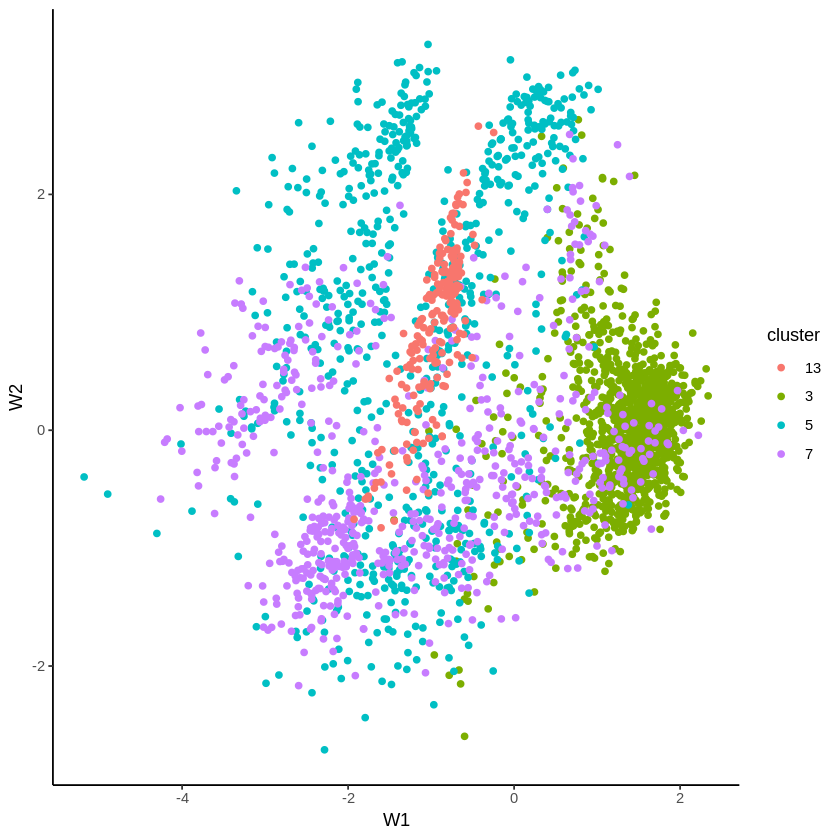

In [32]:
W <- reducedDim(se_zinb)

data.frame(W,cluster=colData(se)$Cluster) %>% ggplot(aes(W1, W2,colour=cluster)) + geom_point() +
theme_classic()

In [124]:
se

class: SummarizedExperiment 
dim: 100 2855 
metadata(0):
assays(2): counts logcounts
rownames(100): ENSG00000251562 ENSG00000169605 ... ENSG00000174748
  ENSG00000163993
rowData names(0):
colnames(2855): AAACGGGCAACGATCT_1 AAAGATGGTAATCACC_1 ...
  TGGCGCAAGAAAGTGG_5 TGGCTGGTCGAATGCT_5
colData names(1): Cluster

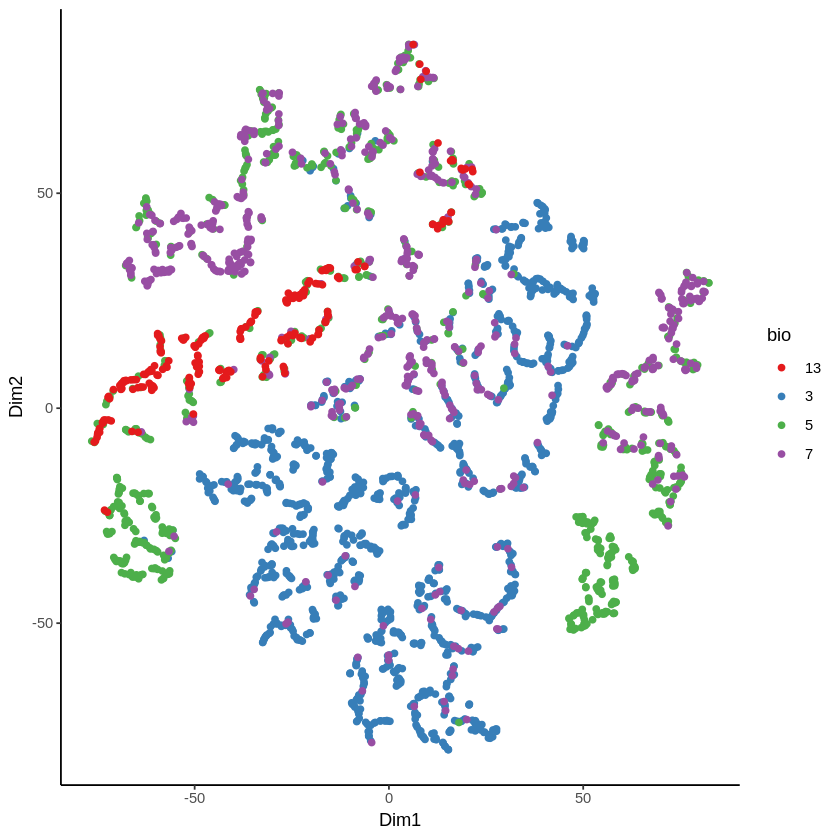

In [33]:
library(Rtsne)

tsne_data <- Rtsne(W, pca = FALSE, perplexity=10, max_iter=5000)

data.frame(Dim1=tsne_data$Y[,1], Dim2=tsne_data$Y[,2], 
           bio=colData(se)$Cluster) %>%
    ggplot(aes(Dim1, Dim2, colour=bio)) + geom_point() + 
    scale_color_brewer(type = "qual", palette = "Set1") + theme_classic()

In [ ]:
weights <- assay(se_zinb, "weights")

In [ ]:
dds <- DESeqDataSet(se_zinb, design = ~ Cluster)

In [ ]:
dds <- DESeq(dds, sfType = "poscounts", useT=TRUE, minmu=1e-6)

In [ ]:
res <- lfcShrink(dds, contrast = c("Cluster3","3","others"), type = 'normal')

In [ ]:
res5 <- lfcShrink(dds, contrast = c("Cluster5","5","others"), type = 'normal')

In [ ]:
res7 <- lfcShrink(dds, contrast = c("Cluster7","7","others"), type = 'normal')

In [ ]:
res13 <- lfcShrink(dds, contrast = c("Cluster13","13","others"), type = 'normal')

In [ ]:
head(res)

In [198]:
se

class: SummarizedExperiment 
dim: 10000 2855 
metadata(0):
assays(2): counts logcounts
rownames(10000): ENSG00000251562 ENSG00000169605 ... ENSG00000145687
  ENSG00000174292
rowData names(0):
colnames(2855): AAACGGGCAACGATCT_1 AAAGATGGTAATCACC_1 ...
  TGGCGCAAGAAAGTGG_5 TGGCTGGTCGAATGCT_5
colData names(5): Cluster Cluster3 Cluster5 Cluster7 Cluster13

In [199]:
library(BiocParallel)

In [202]:
1+1

[1] 2